In [54]:
import glob
from des_helpers import encrypt, dec2bin, bin2hex, dpa_select_function
import numpy as np
import pandas as pd

# Path to the directory with CSV files
dataset_dir = "../HardwareData"
files = glob.glob(f"{dataset_dir}/ENC_DES_4096_*.npz")

data_des = dict(np.load(files[0]))
print(f"Loaded DES data from {files[0]}")
loaded_data = {
	'powertraces':[],
	'messages':[]
}
for i in range(4096):
	loaded_data[f'powertraces'].append(data_des[f'powertrace_{i}'])
	loaded_data[f'messages'].append(data_des[f'messages_{i}'])

Loaded DES data from ../HardwareData/ENC_DES_4096_trials_k=60.npz


In [55]:
# plaintexts = range(0, 2048)

powers_at_t = {}

# Find the minimum value in the entire dataset
# min_value = np.min(data_des)

for t in range(5300,5700):
	powers = []
	for pt_index, value in enumerate(loaded_data[f'messages']):
		power = loaded_data['powertraces'][pt_index][t]
		powers.append(power)
	
	powers_at_t[t]=powers

powers_at_t = pd.DataFrame(powers_at_t)

In [56]:
import matplotlib.pyplot as plt

sbox_key = 4
plaintexts = loaded_data['messages']

dom_at_t = []
select_outs = []
for k in range(64):
	select_outs.append([dpa_select_function(f"{pt:016x}".upper(), k) for pt in plaintexts])

for t in range(5300,5700):
	dom_by_k = []

	for k in range(64):
		sel_values = select_outs[k]

		# Partition the power traces based on selection values
		group0_indices = [i for i, val in enumerate(sel_values) if val == 0]
		group1_indices = [i for i, val in enumerate(sel_values) if val == 1]
		
		# Extract power traces for each group
		group0_powers = [powers_at_t[t][i] for i in group0_indices]
		group1_powers = [powers_at_t[t][i] for i in group1_indices]
		
		# Compute average power consumption for each group at the time point of interest
		avg_group0 = np.mean(group0_powers) if len(group0_powers) > 0 else 0
		avg_group1 = np.mean(group1_powers) if len(group1_powers) > 0 else 0
		
		# Compute the difference of means (DOM)
		dom = avg_group1 - avg_group0
		dom_by_k.append(dom)

	print(f"{t}: {dom}")
	dom_at_t.append(dom_by_k)

5300: -1.7082649742960712
5301: 1.9993682229751357
5302: 0.48117034964775485
5303: -1.2048192972226843
5304: 0.416233259041519
5305: 0.3187359212579395
5306: -0.11300365972761028
5307: 0.18493179598544884
5308: 0.7330395057399528
5309: 0.8550924352512084
5310: 0.7873160447277314
5311: -0.5750117757609132
5312: 4.042728303682225
5313: 0.8675126134794482
5314: -1.0000469837953005
5315: -0.9596278024819185
5316: -0.30395868287973826
5317: 1.013209124396326
5318: 0.436328013670618
5319: 0.6111132178295975
5320: -0.9224815075835977
5321: 1.293940879121692
5322: -0.2113421743958952
5323: -2.3522599324817293
5324: -0.09414646303821428
5325: -1.9941518292080218
5326: 0.14253524082755575
5327: 0.19636006758992153
5328: -3.4305425674378967
5329: -2.775940480832787
5330: -2.320872849209536
5331: -1.127719366028714
5332: 1.140386149558708
5333: 0.35279583394458314
5334: -2.073931267715807
5335: 0.5659038358571706
5336: 0.05665077087996906
5337: -3.045883849856864
5338: -4.257757155786976
5339: -1.

400
5367 5.828789960874246
5369 6.726126538791959
5375 7.177994083404883
5381 5.562372363775239
5404 3.720013360053372
5491 5.886513980341533
5511 3.6691268250785924


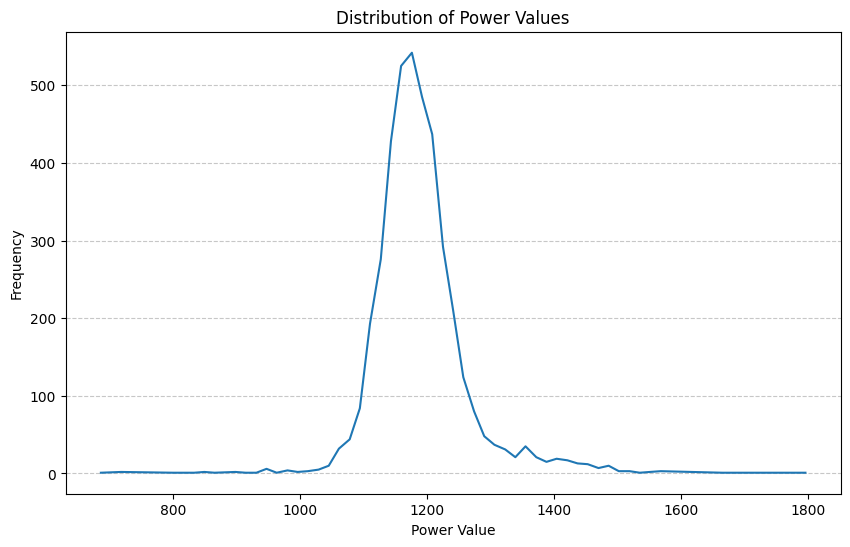

In [57]:
print(len(dom_at_t))

sbox_key = 4
max_dom = -1000
max_t = -1

for t in range(400):
    dom = max(dom_at_t[t])
    key_g = dom_at_t[t].index(dom)
    if key_g == sbox_key:
        print(t + 5300, dom)
        if max_dom < dom:
            max_dom = dom
            max_t = t + 5300


# Sort the values by index (optional, for better visualization)
counts = powers_at_t[max_t].value_counts()

counts = counts.sort_index()

# Plot the value counts
plt.figure(figsize=(10, 6))
counts.plot(kind='line')
plt.title("Distribution of Power Values")
plt.xlabel("Power Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [60]:
dom_at_t[5375-5300]

[-2.032045042466052,
 3.383547984667075,
 -2.472764608667603,
 1.8928782405482707,
 7.177994083404883,
 -2.146685779193149,
 -2.602002930138269,
 2.676435456229001,
 -1.1637780155267592,
 2.4868740910283123,
 1.1029474045669758,
 1.2361850840111401,
 3.077497075102883,
 -2.7763872010355044,
 -3.817016037708072,
 -6.021959093748592,
 2.6943373446542864,
 -1.3116537990340476,
 2.7201518301640135,
 -3.3208186274089257,
 -5.07198681629302,
 -1.3411982375494063,
 1.0886324754519592,
 1.6730172305178712,
 1.9475378865092807,
 -2.5298317288486487,
 -0.26302910029221493,
 0.9882027317705706,
 -2.4052509921309593,
 1.60739010861289,
 0.01897323132834572,
 3.507110704204024,
 -1.0192876569108194,
 3.060447923461652,
 0.5060244184414842,
 -0.4013562447166805,
 1.7014957264957502,
 2.050260184757917,
 -0.2458831343676593,
 -4.28974272947471,
 -0.4003447572929417,
 2.6465069569023854,
 -0.4700483530652946,
 -4.040752851389925,
 3.1540468778612194,
 -1.357242518485009,
 -1.1549248415881266,
 0.25854

In [59]:
trace_data = []
key = f"{60:016x}".upper()

# Append to the list
for index, pt in enumerate(plaintexts):
	trace = loaded_data['powertraces'][index]
	
	power_value = trace[max_t]

	plaintext = f"{pt:016x}".upper()
	ciphertext = bin2hex(encrypt(plaintext, key))

	trace_data.append({
		"Key": key,
		"Plaintext": plaintext,
		"Ciphertext": ciphertext,
		"Power": power_value
	})

# Convert to DataFrame for easier handling
trace_df = pd.DataFrame(trace_data)
trace_df.to_csv("des_extension_data.csv", index=False)